# Load, Preprocess, EDA

In [6]:
import pandas as pd

data_path = '../input/kot-chat/'
data = pd.read_csv(data_path+'ChatbotData .csv',encoding='utf-8')

In [7]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [10]:
sentences = list(data['Q'])+list(data['A'])
print(len(data))
print(sentences[:3])
print(len(sentences))

11823
['12시 땡!', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다']
23646


In [11]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ',''))for s in sentences]

In [13]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 5.2 MB/s  eta 0:00:01
     |████████████████████████████████| 453 kB 46.3 MB/s eta 0:00:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.0
    Uninstalling beautifulsoup4-4.9.0:
      Successfully uninstalled beautifulsoup4-4.9.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [16]:
from konlpy.tag import Okt

okt=Okt()
morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in sentences]
morph_space = [okt.morphs(s) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]
sent_len_by_morph_space = [len(t) for t in morph_space]

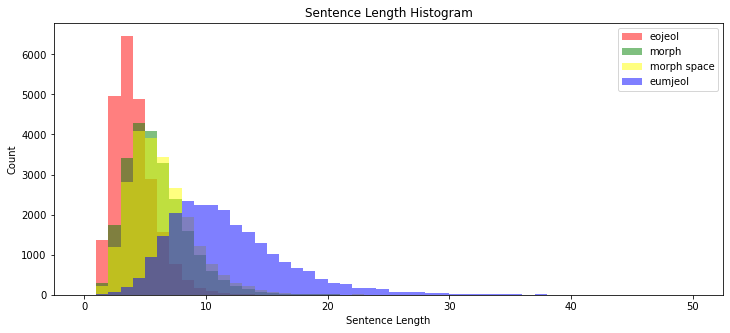

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token,bins=50,range=[0,50],alpha=.5,color='r',label='eojeol')
plt.hist(sent_len_by_morph,bins=50,range=[0,50],alpha=.5,color='g',label='morph')
plt.hist(sent_len_by_morph_space,bins=50,range=[0,50],alpha=.5,color='yellow',label='morph space')
plt.hist(sent_len_by_eumjeol,bins=50,range=[0,50],alpha=.5,color='b',label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [25]:
data.iloc[3]

Q        3박4일 정도 놀러가고 싶다
A            여행은 언제나 좋죠.
label                  0
Name: 3, dtype: object

In [22]:
print(morph_tokenized_sentences[:10])
print(morph_space[:10])
# Why Delete Space replace for morph 

[['12시', '땡', '!'], ['1', '지망', '학교', '떨어졌어'], ['3', '박', '4일', '놀러가고싶다'], ['3', '박', '4일', '정도놀러가고싶다'], ['PPL', '심하네'], ['SD', '카드', '망가졌어'], ['SD', '카드', '안', '돼'], ['SNS', '맞팔', '왜', '안하지', 'ㅠㅠ'], ['SNS', '시간', '낭비', '인거', '아는데', '매일', '하', '는', '중'], ['SNS', '시간', '낭비', '인데', '자꾸', '보게', '됨']]
[['12시', '땡', '!'], ['1', '지망', '학교', '떨어졌어'], ['3', '박', '4일', '놀러', '가고', '싶다'], ['3', '박', '4일', '정도', '놀러', '가고', '싶다'], ['PPL', '심하네'], ['SD', '카드', '망가졌어'], ['SD', '카드', '안', '돼'], ['SNS', '맞팔', '왜', '안', '하지', 'ㅠㅠ'], ['SNS', '시간', '낭비', '인', '거', '아는데', '매일', '하는', '중'], ['SNS', '시간', '낭비', '인데', '자꾸', '보게', '됨']]


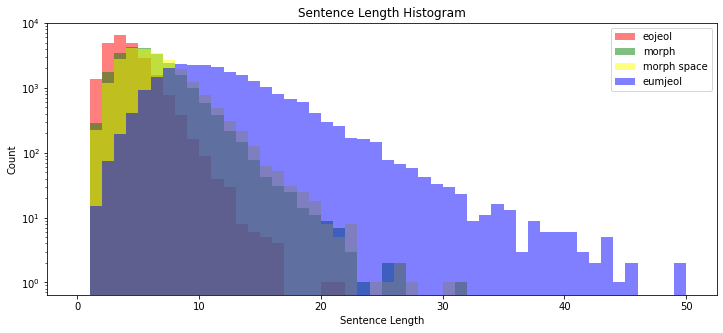

In [26]:
plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token,bins=50,range=[0,50],alpha=.5,color='r',label='eojeol')
plt.hist(sent_len_by_morph,bins=50,range=[0,50],alpha=.5,color='g',label='morph')
plt.hist(sent_len_by_morph_space,bins=50,range=[0,50],alpha=.5,color='yellow',label='morph space')
plt.hist(sent_len_by_eumjeol,bins=50,range=[0,50],alpha=.5,color='b',label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.yscale('log')
plt.legend()
plt.show()

In [29]:
print('어절')
print(pd.Series(sent_len_by_token).describe())
print('형태소')
print(pd.Series(sent_len_by_morph).describe())
print('형태소/공백 제거 X')
print(pd.Series(sent_len_by_morph_space).describe())
print('음절')
print(pd.Series(sent_len_by_eumjeol).describe())

어절
count    23646.000000
mean         3.640531
std          1.742950
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
dtype: float64
형태소
count    23646.000000
mean         5.412543
std          2.560964
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         31.000000
dtype: float64
형태소/공백 제거 X
count    23646.000000
mean         5.832995
std          2.714072
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         31.000000
dtype: float64
음절
count    23646.000000
mean        11.306563
std          4.978944
min          1.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         57.000000
dtype: float64


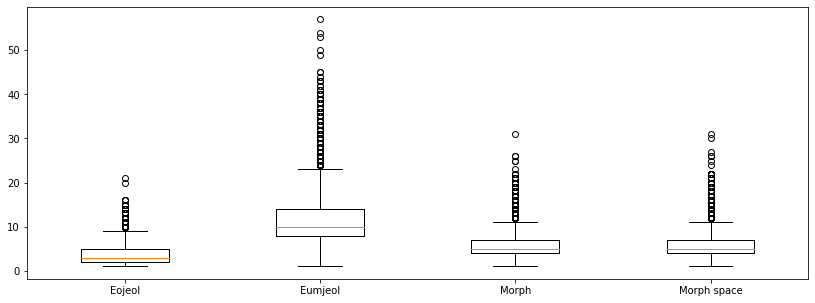

In [31]:
plt.figure(figsize=(14,5))
plt.boxplot([sent_len_by_token,sent_len_by_eumjeol,sent_len_by_morph,sent_len_by_morph_space],labels=['Eojeol','Eumjeol','Morph','Morph space'])
plt.show()

In [32]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

In [41]:
query_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in query_sentences]
query_morph_space_tokenized_sentences = [okt.morphs(s) for s in query_sentences]
query_sent_len_by_morph = [len(q) for q in query_morph_tokenized_sentences]
query_sent_len_by_morph_space = [len(q) for q in query_morph_space_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in answer_sentences]
answer_morph_space_tokenized_sentences = [okt.morphs(s) for s in answer_sentences]
answer_sent_len_by_morph = [len(q) for q in answer_morph_tokenized_sentences]
answer_sent_len_by_morph_space = [len(q) for q in answer_morph_space_tokenized_sentences]



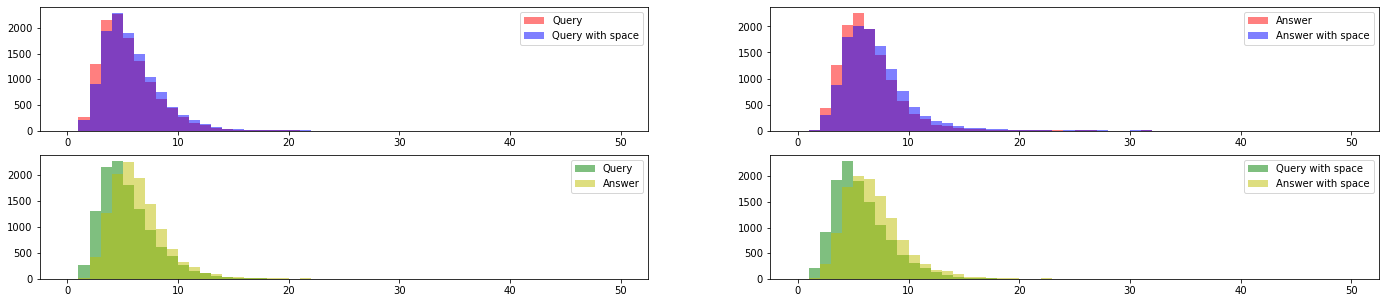

In [47]:
fig,ax = plt.subplots(2,2,figsize=(24,5))
ax[0][0].hist(query_sent_len_by_morph,bins=50,range=[0,50],color='r',label='Query',alpha=.5)
ax[0][0].hist(query_sent_len_by_morph_space,bins=50,range=[0,50],color='b',label='Query with space',alpha=.5)
ax[0][1].hist(answer_sent_len_by_morph,bins=50,range=[0,50],color='r',label='Answer',alpha=.5)
ax[0][1].hist(answer_sent_len_by_morph_space,bins=50,range=[0,50],color='b',label='Answer with space',alpha=.5)
ax[1][0].hist(query_sent_len_by_morph,bins=50,range=[0,50],color='g',label='Query',alpha=.5)
ax[1][1].hist(query_sent_len_by_morph_space,bins=50,range=[0,50],color='g',label='Query with space',alpha=.5)
ax[1][0].hist(answer_sent_len_by_morph,bins=50,range=[0,50],color='y',label='Answer',alpha=.5)
ax[1][1].hist(answer_sent_len_by_morph_space,bins=50,range=[0,50],color='y',label='Answer with space',alpha=.5)
for single_ax in ax.ravel():
    single_ax.legend()
plt.show()

In [48]:
print('Query'.center(40,'='))
print(pd.Series(query_sent_len_by_morph).describe())
print('Query with space'.center(40,'='))
print(pd.Series(query_sent_len_by_morph_space).describe())
print('Answer'.center(40,'='))
print(pd.Series(answer_sent_len_by_morph).describe())
print('Answer with space'.center(40,'='))
print(pd.Series(answer_sent_len_by_morph_space).describe())

=================Query==================
count    11823.000000
mean         4.950436
std          2.482402
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         20.000000
dtype: float64
============Query with space============
count    11823.000000
mean         5.268121
std          2.542118
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         21.000000
dtype: float64
=================Answer=================
count    11823.000000
mean         5.874651
std          2.555032
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         31.000000
dtype: float64
===========Answer with space============
count    11823.000000
mean         6.397869
std          2.762683
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         31.000000
dtype: float64


In [49]:
# Answer with space > Answer > Query with space > Query
# Outlier Data Distribution

In [50]:
print(okt.pos('오늘은2020년의마지막날이다'))
print(okt.pos('오늘은 2020년의 마지막 날 이다'))

[('오늘', 'Noun'), ('은', 'Josa'), ('2020년', 'Number'), ('의마지막날이다', 'Foreign')]
[('오늘', 'Noun'), ('은', 'Josa'), ('2020년', 'Number'), ('의', 'Foreign'), ('마지막', 'Noun'), ('날', 'Noun'), ('이다', 'Josa')]


In [51]:
# USE ONLY Noun, Adj, Verb

query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token,tag in okt.pos(s):
        if tag in ['Noun','Adjective','Verb']:
            query_NVA_token_sentences.append(token)
for s in answer_sentences:
    for token,tag in okt.pos(s):
        if tag in ['Noun','Adjective','Verb']:
            answer_NVA_token_sentences.append(token)

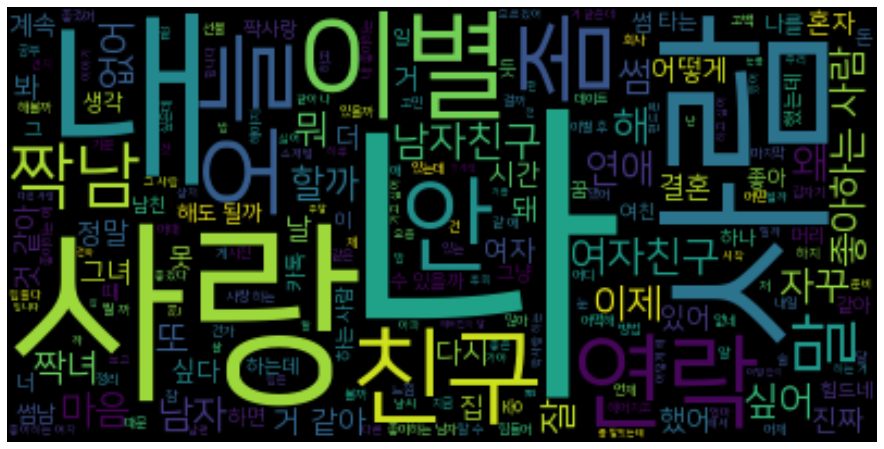

In [56]:
from wordcloud import WordCloud

plt.figure(figsize=(16,8))
query_wordcloud = WordCloud(font_path='../input/nanum34/NanumSquareR.ttf').generate(' '.join(query_NVA_token_sentences))
plt.imshow(query_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

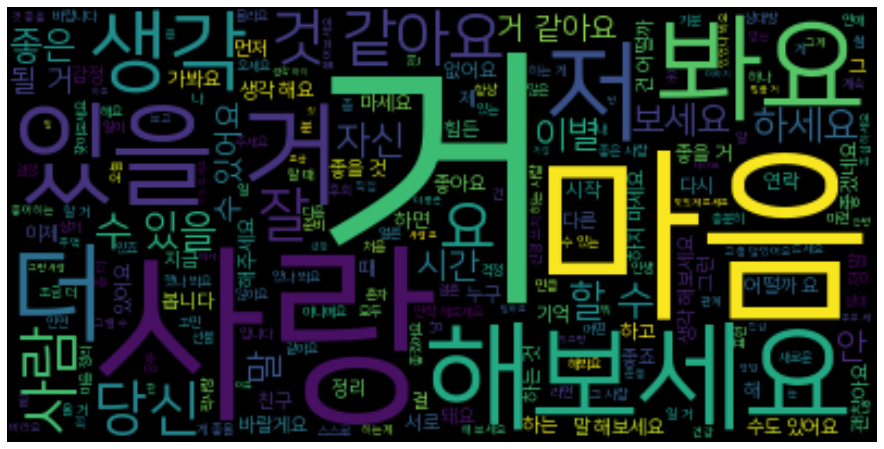

In [57]:
plt.figure(figsize=(16,8))
answer_wordcloud = WordCloud(font_path='../input/nanum34/NanumSquareR.ttf').generate(' '.join(answer_NVA_token_sentences))
plt.imshow(answer_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()